<a href="https://colab.research.google.com/github/omarn8911/PROYECTO_CURSO_MACHINE_LEARNING_APLICADO_CON_PYTHON/blob/master/Modelo_predictivo_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import pandas.util.testing as tm
import sklearn

In [3]:
%matplotlib  inline

In [4]:
movies = pd.read_csv('https://github.com/JuanPabloMF/datasets-platzi-course/blob/master/datasets/peliculas.csv?raw=true',encoding='utf-8')

type(movies)

pandas.core.frame.DataFrame

In [5]:
movies.head()

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [6]:
movies.columns

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [7]:
movies.index

RangeIndex(start=0, stop=5043, step=1)

In [8]:
columna1 = movies['movie_title']
columna1.head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

In [9]:
linea = movies.loc[10,:]
linea

movie_title                                Batman v Superman: Dawn of Justice 
title_year                                                                2016
color                                                                    Color
aspect_ratio                                                              2.35
duration                                                                   183
language                                                               English
country                                                                    USA
duration.1                                                                 183
genres                                                 Action|Adventure|Sci-Fi
content_rating                                                           PG-13
plot_keywords                based on comic book|batman|sequel to a reboot|...
director_name                                                      Zack Snyder
actor_1_name                                        

In [10]:
linea = movies.loc[:,'movie_title'].head(11)
linea

0                                               Avatar 
1             Pirates of the Caribbean: At World's End 
2                                              Spectre 
3                                The Dark Knight Rises 
4     Star Wars: Episode VII - The Force Awakens    ...
5                                          John Carter 
6                                         Spider-Man 3 
7                                              Tangled 
8                              Avengers: Age of Ultron 
9               Harry Potter and the Half-Blood Prince 
10                  Batman v Superman: Dawn of Justice 
Name: movie_title, dtype: object

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   color                      5024 non-null   object 
 3   aspect_ratio               4714 non-null   float64
 4   duration                   5028 non-null   float64
 5   language                   5031 non-null   object 
 6   country                    5038 non-null   object 
 7   duration.1                 5028 non-null   float64
 8   genres                     5043 non-null   object 
 9   content_rating             4740 non-null   object 
 10  plot_keywords              4890 non-null   object 
 11  director_name              4939 non-null   object 
 12  actor_1_name               5036 non-null   object 
 13  actor_2_name               5030 non-null   objec

In [12]:
#separando columnas numéricas de las columnas de texto
# si quisiera validar que tipos tengo uso: movies.dtypes
#si quisiera validar cuales son enteros con respuesta booleana uso: movies.dtypes == int
#si quisiera validar cuales son flotantes con respuesta booleana uso: movies.dtypes == float

#para este ejercicio voy a validar de una vez los flotantes y enteros, osea numéricos en una sóla linea:
num = (movies.dtypes == float) | (movies.dtypes == int) #y guardo esas columnas en la variavle num

In [14]:
#valido las columnas que son de texto:
movies.dtypes == object

movie_title                   True
title_year                   False
color                         True
aspect_ratio                 False
duration                     False
language                      True
country                       True
duration.1                   False
genres                        True
content_rating                True
plot_keywords                 True
director_name                 True
actor_1_name                  True
actor_2_name                  True
actor_3_name                  True
cast_total_facebook_likes    False
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [13]:
num.index #con esto pido los index de mi tablita con columnas y booleano

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [14]:
#si itero sobre los elementos de mi tabla de columbas obtengo los booleanos
for el in num:
  print(el)

False
True
False
True
True
False
False
True
False
False
False
False
False
False
False
True
True
True
True


In [17]:
#Si itero sobre los index, obtengo los nombres de las columnas
for el in num.index:
  print(el)

movie_title
title_year
color
aspect_ratio
duration
language
country
duration.1
genres
content_rating
plot_keywords
director_name
actor_1_name
actor_2_name
actor_3_name
cast_total_facebook_likes
budget
imdb_score
gross


In [15]:
#ahora voy a iterar y guardar en una variables sólo las columnas que tengan True en su valor
num_cols = [c for c in num.index if num[c]]

In [19]:
#revisamos
num_cols

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [16]:
#Guardamos en obj_cols sólo las columnas que son texto
obj = (movies.dtypes == object)
obj_cols = [c for c in obj.index if obj[c]] 

In [21]:
#revisamos
obj_cols

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

In [17]:
movies_num = movies[num_cols]

In [18]:
movies_num.describe( )

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


In [ ]:
movies_num['duration'].hist()

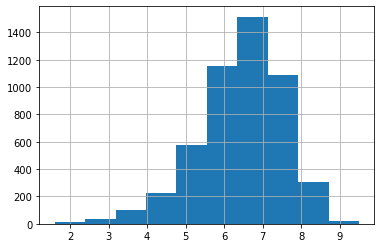

In [26]:
movies_num['imdb_score'].hist()

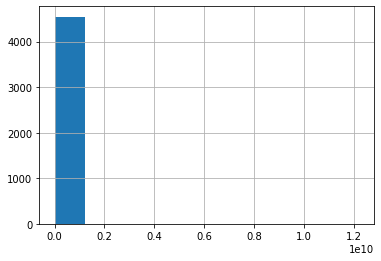

In [21]:
movies_num['budget'].hist()

In [19]:
mask = (movies_num['budget'] > 1e9)

In [20]:
movies[mask]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


In [21]:
# el dataset anterior no servia porque los datos tenian problemas con la moneda en budget
#asi que importamos otro

financials = pd.read_csv('https://github.com/JuanPabloMF/datasets-platzi-course/blob/master/datasets/thenumbers.csv?raw=true')

In [22]:
financials = financials[['movie_title','production_budget','worldwide_gross']]

In [23]:
financials.shape

(4341, 3)

In [ ]:
movies.shape

In [24]:
movies_num = pd.concat([movies_num, movies['movie_title']], axis = 1)

In [25]:
#antes de hacer el joing entre financials y movies_num debemos eliminar duplicados sino no nos dejará hacer el JOIN
movies_num = movies_num.loc[:,~movies_num.columns.duplicated()] 

In [30]:
movies_v2 = pd.merge(financials,movies_num,on='movie_title',how='left')

In [31]:
movies_v2.shape

(4385, 11)

In [33]:
help(pd.Series.value_counts)

Help on function value_counts in module pandas.core.base:

value_counts(self, normalize=False, sort=True, ascending=False, bins=None, dropna=True)
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : bool, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : bool, default True
        Sort by frequencies.
    ascending : bool, default False
        Sort in ascending order.
    bins : int, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : bool, default True
        Don't include counts of NaN.
    
    Returns
    -------
    Series
    
    See Also
    --------
    Series.count: Number 

In [ ]:
movies_v2.notnull().apply(pd.Series.value_counts) 
#al hacerle apply con el value_counts, le estamos pidiendo que nos cuente cuántos notnull están en True o False en cada columna

In [35]:
(movies_v2 != 0).apply(pd.Series.value_counts) #contamos cuántas columnas están en cero (False) y cuantas son diferentes de 0 (True)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


In [36]:
available = ((movies_v2 != 0) & (movies_v2.notnull()))

In [40]:
available.all(axis=1).value_counts()
#False nos dice cuántas filas tenemos con valores falsos

True     3408
False     977
dtype: int64

In [41]:
mask = available['worldwide_gross'] #guardamos en mask qué filas tienen el dato disponible (True) o no (False)

In [42]:
mask #mostramos las filas donde nuestra variable objetivo worldwide_gross está disponible

0        True
1        True
2        True
3        True
4        True
        ...  
4380     True
4381    False
4382     True
4383    False
4384     True
Name: worldwide_gross, Length: 4385, dtype: bool

In [44]:
movies_v2 = movies_v2[mask] #actualizamsos nuestro dataframe sólo con los registros donde worldwide_gross está disponible

In [45]:
((movies_v2 != 0) & (movies_v2.notnull())).worldwide_gross.value_counts()
#que tantos valores completos tenemos que no estén ni en null ni en cero
#veremos que a este punto ya no tenemos False en nuestro dataframe, por tanto ya quedó limpio

True    4104
Name: worldwide_gross, dtype: int64

In [55]:
from sklearn.impute import SimpleImputer #importando la clase Imputer de Sklearn
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') #instanciamos la clase, reconociendo cuales valores son faltantes en las demas columnas "Nan"
#con strategy = 'mean' estamos tratando a los datos faltantes, poniendoles un valor promedio

In [56]:
movies_v2 #verificamos cómo está el dataset antes de empezar a trabajar con datos númericos (estadistica para el  modelo)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
3,Spectre,300000000,879620923,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,275000000,1084439099,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
...,...,...,...,...,...,...,...,...,...,...,...
4378,Primer,7000,841926,2004.0,1.85,77.0,77.0,368,7000.0,7.0,424760.0
4379,Cavite,7000,71644,2005.0,NaN,80.0,80.0,0,7000.0,6.3,70071.0
4380,The Mongol King,7000,900,2005.0,NaN,84.0,84.0,93,3250.0,7.8,NaN
4382,Shanghai Calling,3967,10443,2012.0,2.35,100.0,100.0,2386,NaN,6.3,10443.0


In [57]:
#quitamos las columnas 'movie_title'  porque es de texto (necesitamos solo las numericas) 
movies_v2 = movies_v2.drop('movie_title', axis=1)

In [64]:
#y quitamos también duration que está duplicada
movies_v2 = movies_v2.drop('duration', axis=1)

KeyError: ignored

In [67]:
movies_v2.values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09,            nan, ...,
                   nan, 7.10000000e+00,            nan],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00,            nan],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
                   nan, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [65]:
#reemplazando los datos con el imputer (reemplaza los Nan que hayan en movies_v2)
values = imputer.fit_transform(movies_v2)

In [66]:
values
#nos entrega un arrya de numpy

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09, 2.00213073e+03, ...,
        4.04553863e+07, 7.10000000e+00, 4.83193329e+07],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00, 4.83193329e+07],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        4.04553863e+07, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [70]:
#llevamos el arraya  un dataframe
x = pd.DataFrame(values)
x

,0,1,2,3,4,5,6,7,8
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08
...,...,...,...,...,...,...,...,...,...
4099,7000.0,8.419260e+05,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0,4.247600e+05
4100,7000.0,7.164400e+04,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3,7.007100e+04
4101,7000.0,9.000000e+02,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8,4.831933e+07
4102,3967.0,1.044300e+04,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3,1.044300e+04


In [71]:
#nos falta agregar los índices, lo hacemos con:
x.columns = movies_v2.columns
x.index = movies_v2.index

In [72]:
x.head() #aqui podemos ya ver el dataframe limpio y completo

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


In [74]:
#guardamos el dataframe en un .csv
from google.colab import files
x.to_csv('x.csv',index=False)
files.download('x.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>